# CS171-EE142 - Fall 2022 - Homework 4

# Due: Friday, December 2, 2022 @ 11:59pm 

### Maximum points: 45 pts


## Submit your solution to Gradescope:
1. Submit a single PDF to **HW4**
2. Submit your jupyter notebook to **HW4-code**

**See the additional submission instructions at the end of this notebook**


### Enter your information below:

    Your Name (submitter):  Yash Aggarwal
    Your student ID (submitter): 862333037

<div style="color: #000000;background-color: #EEEEFF">
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>


## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


# Overview 
In this assignment we will implement and test K-means algorithm for clustering and principal component analysis (PCA) for dimensionality reduction.  

If you are asked to **implement** a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, please ask. 

Before you start, make sure you have installed all those packages in your local Jupyter instance

## Read *all* cells carefully and answer all parts (both text and missing code)

You will complete all the code marked `TODO` and answer descriptive/derivation questions 



In [1]:
!pip install thispersondoesnotexist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for thispersondoesnotexist: filename=thispersondoesnotexist-1.0.2-py3-none-any.whl size=4580 sha256=56b7d96006b107b456df8c1ef995013b9640eac0e8e6601b0e3d268b76355b9c
  Stored in directory: /root/.cache/pip/wheels/b5/9d/21/4ffb20c506199062b76f6ca1f0a27507fdd510876046b97036
Successfully built thispersondoesnotexist


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import make_blobs
from urllib import request
# make sure you import here everything else you may need

## Question 1. K-Means Clustering [Total: 30 pts]

In this exercise we will first implement K-means algorithm for clustering. Then we will perform color-based segmentation using K-means.



## K-means clustering implementation [10 pts]

Let us first implement K-means algorithm that accepts target number of clusters (K) and data vectors $\mathbf{x}_1,\ldots, \mathbf{x}_N$, each of length $d$. At this point, we will implement the K-means algorithm for general $d$; later we will test and visualize the results for $d=2,3$. 
			
A general K-means algorithm can be described as follows. 
Suppose we are given training examples $\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N$, where each $\mathbf{x}_i \in \mathbb{R}^d$. We want to group the $N$ data samples into K clusters.  
* Initialize cluster centers $\mu_1,\ldots, \mu_K \in \mathbb{R}^d$ at random
* Repeat until convergence 
  * For every data point $\mathbf{x}_i$, update its label as 
  \begin{equation*}
  z_i = \text{argmin}_j \|\mathbf{x}_i - \mu_j\|_2^2. 
  \end{equation*}
  
  * For each cluster $j$, update its center $\mu_j$ as mean of all points assigned to cluster $j$: 
  $$ \mu_j = \dfrac{\sum_{i=1}^N \delta\{z_i = j\} \mathbf{x}_i}{\sum_{i=1}^N \delta \{z_i = j\}}.$$  
  $\delta\{z_i = j\}$ denotes an indicator function that is equal to 1 if $z_i = j$ and zero otherwise. $\sum_{i=1}^N\delta\{z_i = j\}$ indicates the number of points in $i$th cluster. 

We can define sum of squared errors (SSE) as 
$$ \text{SSE}  = \sum_j \sum_i \delta\{z_i = j\} \|\mathbf{x}_i - \mu_j\|_2^2$$`


Implement the K-means clustering algorithm as a function with the following specifications:

```python
def kmeans_clustering(data, K, max_iter = 100, tol = pow(10,-3)):
```
where 
1. 'data' is the $N \times d$ matrix that contains all data points ($N$ is the number of data points and $d$ is the number of features, each row of the matrix is a data point), 
2. 'K' is the number of clusters, 
3. 'max_iter' is the maxium number of iterations, and 
4. 'tol' is the tolerance for the change of the sum of squares of errors that determines convergence.

Your function should return the following variables: 
1. 'labels': this is an $N\times 1$ vector (where $N$ is the number of data points) where the $i$-th position of that vector contains the cluster number that the $i$-th data point is assigned to, 
2. 'centroids': this is a $K\times d$ matrix, each row of which contains the centroid for every cluster, 
3.  'SSE_history': this is a vector that contains all the sum of squares of errors per iteration of the algorithm, 
4. 'iters': this is the number of iterations that the algorithm ran.

Here we are going to implement the simplest version of K-means, where the initial centroids are chosen entirely at random among all the data points.

Your algorithm should converge if 1) the maximum number of iterations is reached, or 2) if the SSE between two consecutive iterations does not change a lot. 

In order to check for the latter condition, you may use the following piece of code:
```python
if np.absolute(SSE_history[it] - SSE_history[it-1])/SSE_history[it-1] <= tol
```



In [3]:
def SSE_loss(X, y_pred, y_true, centroids, k):
  loss = 0

  for center in centroids:
    for point,pred_label,true_label in zip(X,y_pred,y_true):
      if pred_label == true_label:
        d = np.linalg.norm(center - point, 2) ** 2
        loss += d

  return loss

In [4]:
# TODO 
# K-means clustering
def kmeans_clustering(data, K, y_true, max_iter=100, tol = pow(10,-3), random_state = 42): 
  # Inputs
  #   data - N x d array
  #   K - number of clusters
  #   max_iter - maximum iterations for K-means
  #   tol - stopping parameter that checks relative change in sum of squared errors
  # 
  # Outputs: 
  #   labels - cluster assignment label for each data sample (N values)
  #   centroid - centroids of each cluster (K vectors)
  #   SSE_history - table of SSE record at every iteration
  #   iter - total number of iterations at stopping/convergence

  # TODO
  # Write your function for K-means clustering

  # initialize random cluster centers
  # fix a seed for random number generator
  rng = np.random.default_rng(seed=random_state)
  min = np.amin(data)
  max = np.amax(data)
  centroids = []

  for i in range(K):
    centroids.append(rng.integers(low = min, high = max, size = data.shape[1]))


  iter = 0
  SSE_history = []

  for epoch in range(max_iter):

    iter = epoch

    # calcluate distance and assign cluster to points
    labels = np.array([])
    for point in data:
      dis = np.array([])
      for center in centroids:
        dis = np.append(dis, np.linalg.norm(point - center,2))
      labels = np.append(labels, np.argmin(dis))

    # calculate new cluster centers
    new_centroids = []
    for label in range(K):
      points_for_label = data[labels == label]
      if len(points_for_label) > 0:
        new_centroids.append(np.mean(points_for_label,axis=0))
      else :
        new_centroids.append(centroids[label])

    # check for loss
    loss = SSE_loss(data, labels, y_true, new_centroids, K)
    
    SSE_history.append(loss)


    if epoch > 1 and np.absolute(SSE_history[epoch] - SSE_history[epoch-1])/SSE_history[epoch-1] <= tol:
      print ('break by tolerance', np.absolute(SSE_history[epoch] - SSE_history[epoch-1])/SSE_history[epoch-1])
      break

    centroids = np.array(new_centroids)



  # return labels, centroids, SSE_history, iter
  return labels, centroids, SSE_history, iter

### Test K-means on simulated data with different values of K [3 pts]

Let us create synthetic data with `num_clusters` clusters in 2-dimensional space and apply K-means clustering. 

You should try with different values of `num_clusters` and `K'. 



(-13.232027394771677,
 13.871361924952618,
 -20.109856225568763,
 14.784451565045881)

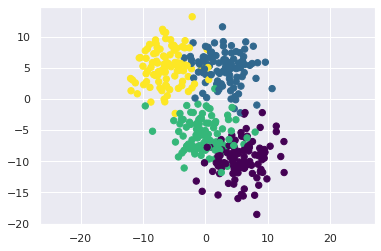

In [5]:
num_clusters = 4
X, y_true = make_blobs(n_samples=400,centers=num_clusters,cluster_std=3,random_state=10)

plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
ax = plt.gca()
ax.axis('equal')

Let us now run K-means using different values of K.

Try `K = [num_clusters-1, num_clusters, num_clusters+1]`

------------ For K =  3  --------------------
break by tolerance 0.0


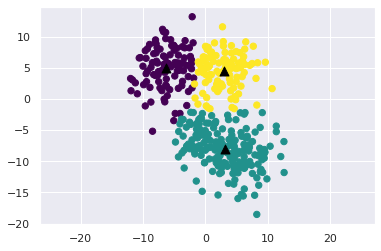

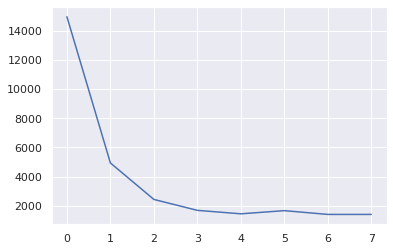

------------------------------
------------ For K =  4  --------------------
break by tolerance 0.02110482200137773


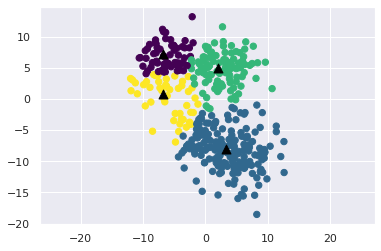

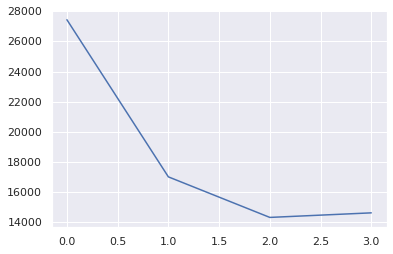

------------------------------
------------ For K =  5  --------------------
break by tolerance 0.023445832898492006


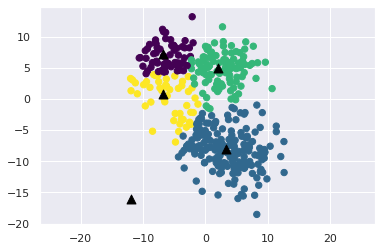

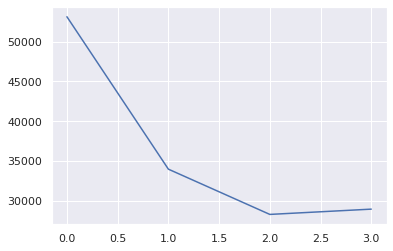

------------------------------


In [6]:
# TODO 
# Run K-means for different values of K. 

for K in [num_clusters-1,num_clusters,num_clusters+1]:
  print('------------ For K = ', K, ' --------------------')

  # labels, centroids, SSE_history, iters = kmeans_clustering(X,K)
  labels, centroids, SSE_history, iters = kmeans_clustering(X,K,y_true, max_iter=100, tol=1e-1, random_state = 42)

  # TODO 
  # plot your data (one color per cluster)
   
  plt.figure(1)
  centroids = np.array(centroids)
  plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
  plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=80, cmap='viridis', marker = '^')
  ax = plt.gca()
  ax.axis('equal')
  plt.show()

  # TODO 
  # plot SSE over different iterations 
  plt.figure(2)
  plt.plot(SSE_history)
  plt.show()

  print('------------------------------')

### Answer the following questions [4 pts]

- Q: What happens to SSE at every iteration of K-means algorithm (did it increase/decrease)? [1 pt]

> A: SSE decreases with every iteration of K-means. This is because the clusters are taking proper shape and thus error is reducing.


- Q: How does the SSE change as you increase K ? [1 pt]

> A:  If we increase the number of clusters, and the extra clusters claim data points, then SSE will increase as there will be miss classification. If the extra clusters do not claim points and are isolated in the corner, then SSE will be same as that of K = 4 as there will be no miss classification.

- Q: What happens if you increase the `cluster_std` of blobs above to `cluster_std=5` ? [2 pts] 
```
X, y_true = make_blobs(n_samples=400,centers=num_clusters,cluster_std=3,random_state=10)
```

> A: If we increase the cluster_Std, then the datapoints scatter and the clusters overlap with each other. This causes K-means to misclassify the points as they are now in other cluster regions.

### Color segmentation/quantization [10 pts]

Now we will use K-means to perform segmentation/quantization on a color image. 

Each pixel in a given image will be a feature vector containing 3 color components (RGB). We will first group all colors into K clusters, which will provide us a color palatte. Then we will replace the color in every pixel with one of the colors in the color palatte (that is the centroid of the cluster in which RGB value of a pixel falls). 

We will use K-means script from previous step to segment your image into K clusters. To create a "quantized" output image, replace every pixel in your image with the center of the cluster assigned to it. Report your results for K= $\{2,4, 8, 16, 32, 64\}$ clusters.  

__You will need a colorful selfie__

Take a _selfie_ of yourself with a background that has different colors from your skin and clothing. 

Let us say you name the image `selfie.jpg`



In [7]:
path_to_dataset = 'https://d1u36hdvoy9y69.cloudfront.net/cs-171-intro-to-ml/me_linkedin.jpg'
response = request.urlretrieve(path_to_dataset, "test_image.jpg")

uint8
(800, 800, 3)


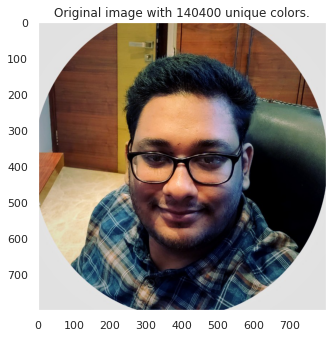

In [8]:
# load and display an image with Matplotlib
from matplotlib import image

# load image as pixel array
img = image.imread('./test_image.jpg')
# summarize shape of the pixel array
print(img.dtype)
print(img.shape)

# You can debug your code using some other image, 
# but you must use your selfie for final results
# from sklearn.datasets import load_sample_image
# # load the picture 
# img = load_sample_image('china.jpg')

h, w, c = img.shape
unique_colors = np.unique(np.reshape(img,(h*w,c)),axis = 0)

plt.figure()
plt.clf()
ax = plt.axes([0, 0, 1, 1])
# plt.axis('off')
plt.grid(False)
plt.title('Original image with {0:d} unique colors.'.format(unique_colors.shape[0]))
plt.imshow(img)
plt.show()


Before performing the clustering, we will process the image data. 

1. You can crop or resize your image to a small size if the image is large. An image close to $100\times 100$ pixels will be sufficient for this experiment. 

2. Convert 8 bit integers to floats by dividing every pixel by 255 so that we can perform floating point operations and plot the arrays as images using plt.imshow that works well on float data in the range [0-1].



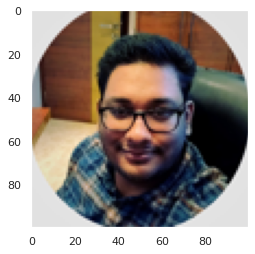

In [9]:
# Resize image to speed things up

# Importing Image class from PIL module 
from PIL import Image 

# use resize function if needed 

# TODO (if necessary)

img = Image.open('./test_image.jpg')
img_size = img.size

# modify the size 
new_size = [100,100]
img = img.resize(new_size)
img = np.asarray(img)
plt.imshow(img)
plt.grid(False)

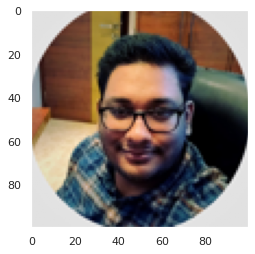

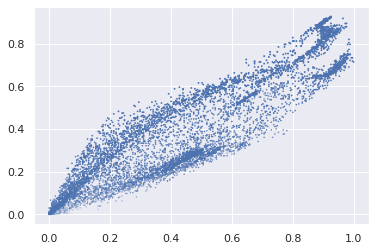

In [10]:
# Preprocessing the data for clustering
# convert to float64 in range [0,1]
if np.max(img) > 1:
  img = np.array(img, dtype=np.float64) / 255
plt.imshow(img)
plt.grid(False)

# Load Image and transform to a 2D numpy array.
h, w, c = original_shape = tuple(img.shape)
assert c == 3
data = np.reshape(img, (w * h, c))

plt.figure()
plt.scatter(data[:,0],data[:,1],data[:,2])

Now we will perform two steps. 

1. K-means clustering for different values of K using the `kmeans_clustering` function above. 

2. Replace all the colors in the original image with the centroids of the cluster each of them belong to. This will give us a "segmented/quantized image" for different values of K; let us denote each image as `img_seg`. 

Plot the original image and the `img_seg` for `K = 2, 4, 8, 16, 32, 64.` 

In [11]:
def plotData(data, labels, K, new_centroids):
    new_centroids = np.array(new_centroids)
    for label in range(K):
        points_for_label = data[labels == label]
        plt.scatter(points_for_label[:, 0], points_for_label[:, 1], points_for_label[:,2], c=new_centroids[label])
    
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c = 'black', s=40)
    ax = plt.gca()
    ax.axis('equal')
    plt.show()

In [12]:
# TODO 
# K-means clustering
def kmeans_clustering_2(data, K, max_iter=100, tol = pow(10,-3), random_state = 42): 
    # Inputs
    #   data - N x d array
    #   K - number of clusters
    #   max_iter - maximum iterations for K-means
    #   tol - stopping parameter that checks relative change in sum of squared errors
    # 
    # Outputs: 
    #   labels - cluster assignment label for each data sample (N values)
    #   centroid - centroids of each cluster (K vectors)
    #   SSE_history - table of SSE record at every iteration
    #   iter - total number of iterations at stopping/convergence

    # TODO
    # Write your function for K-means clustering

    # initialize random cluster centers
    # fix a seed for random number generator
    rng = np.random.default_rng(seed=random_state)
    min = np.amin(data)
    max = np.amax(data)
    centroids = []

    for i in range(K):
        centroids.append([0.6]*data.shape[1])

    iter = 0
    SSE_history = []

    for epoch in range(max_iter):
        iter = epoch

        # calcluate distance and assign cluster to points
        labels = np.array([])
        for point in data:
            dis = np.array([])
            for center in centroids:
                dis = np.append(dis, np.linalg.norm(point - center,2))
            labels = np.append(labels, np.argmin(dis))

        # calculate new cluster centers
        new_centroids = []
        for label in range(K):
            points_for_label = data[labels == label]
            if len(points_for_label) > 0:
                new_centroids.append(np.mean(points_for_label,axis=0))
            else :
                new_centroids.append(centroids[label])

        # print ('for epoch', epoch)
        # plotData(data, labels, K, new_centroids)

        # check for loss
        # loss = SSE_loss(data, labels, y_true, new_centroids, K)

        # SSE_history.append(loss)


        # if epoch > 1 and np.absolute(SSE_history[epoch] - SSE_history[epoch-1])/SSE_history[epoch-1] <= tol:
        #   print ('break by tolerance', np.absolute(SSE_history[epoch] - SSE_history[epoch-1])/SSE_history[epoch-1])
        #   break

        if np.all(np.array(centroids) == np.array(new_centroids)):
            print ('break by no change in centroids')
            break

        centroids = np.array(new_centroids)

        if iter == max_iter:
            print ('max iterations reached')

    print ('final result')
    plotData(data, labels, K, new_centroids)


    # return labels, centroids, SSE_history, iter
    return labels, centroids, SSE_history, iter

for K 2


break by no change in centroids
final result


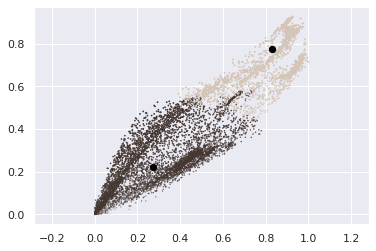

[[0.27150986 0.22114989 0.20052117]
 [0.83100131 0.77225276 0.71203376]]



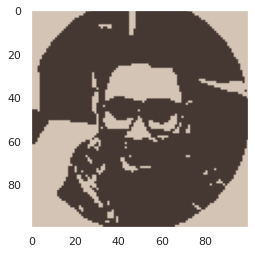

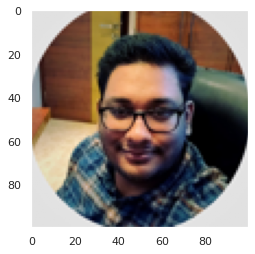

for K 3


break by no change in centroids
final result


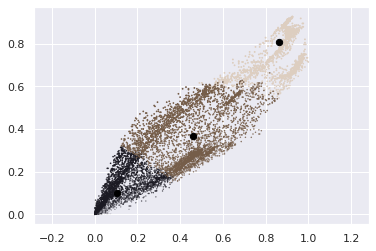

[[0.10482811 0.10094361 0.13655748]
 [0.8651684  0.80718861 0.75285428]
 [0.4595088  0.36639184 0.2869567 ]]



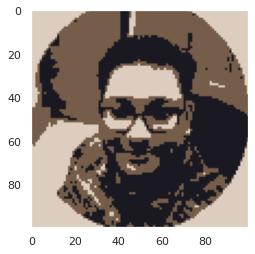

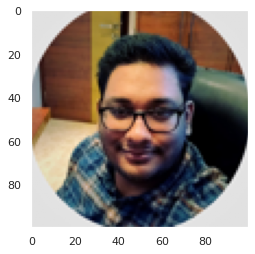

for K 4


break by no change in centroids
final result


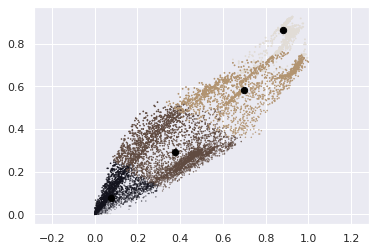

[[0.07540405 0.07467783 0.11338232]
 [0.88394832 0.86447423 0.8390955 ]
 [0.3763232  0.29433079 0.25316509]
 [0.69837713 0.58171269 0.44138544]]



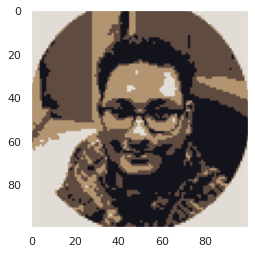

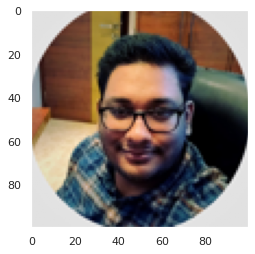

for K 8


break by no change in centroids
final result


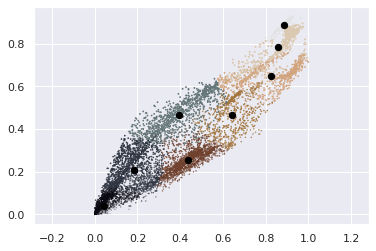

[[0.04365298 0.04020872 0.074077  ]
 [0.88608073 0.88593539 0.88538973]
 [0.43866239 0.25590715 0.17599224]
 [0.82746644 0.648646   0.49933266]
 [0.18466108 0.20934277 0.25333046]
 [0.85711321 0.78240303 0.69058251]
 [0.64097169 0.46413249 0.24693595]
 [0.39635583 0.46738106 0.46831965]]



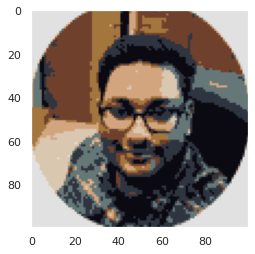

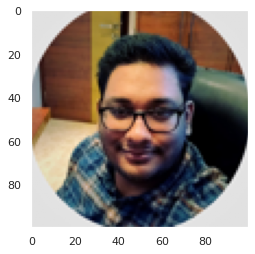

for K 16


break by no change in centroids
final result


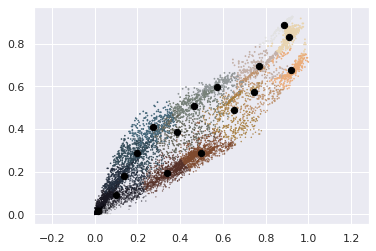

[[0.01545716 0.01369394 0.03786754]
 [0.88550393 0.88549376 0.88530556]
 [0.34029687 0.19296317 0.15661841]
 [0.92125376 0.67826917 0.48793474]
 [0.09895411 0.08907502 0.13524043]
 [0.90995212 0.82985636 0.68830369]
 [0.49868086 0.28864998 0.17924197]
 [0.13658567 0.17967289 0.24173625]
 [0.65141363 0.49043511 0.23912605]
 [0.19802116 0.28868667 0.34270032]
 [0.76921017 0.69468462 0.66194189]
 [0.38363905 0.38454565 0.33908918]
 [0.74558256 0.57407828 0.42770838]
 [0.27447019 0.40970489 0.47676768]
 [0.57118757 0.5973067  0.60312246]
 [0.46594771 0.50694989 0.47293028]]



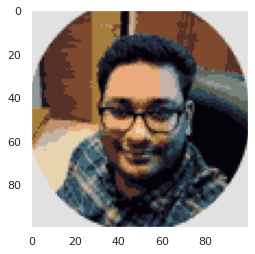

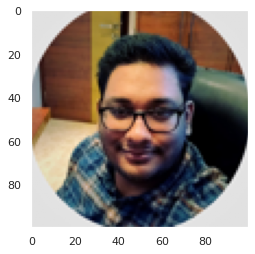

for K 32


final result


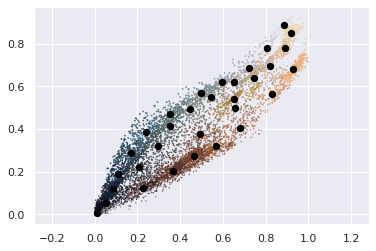

[[0.00885444 0.0061694  0.02284932]
 [0.88625652 0.88623596 0.88603038]
 [0.22439304 0.12429169 0.12645076]
 [0.93028571 0.68177031 0.48657703]
 [0.05437597 0.05379738 0.09963473]
 [0.91921232 0.85131701 0.70781789]
 [0.36563406 0.20454809 0.15717601]
 [0.08676085 0.11967732 0.18962483]
 [0.65449264 0.539592   0.20093748]
 [0.10981973 0.19108159 0.28831436]
 [0.80739496 0.78084034 0.79316527]
 [0.20834092 0.22093122 0.23927639]
 [0.89016591 0.77794872 0.63692308]
 [0.16831318 0.28966318 0.37215276]
 [0.72039666 0.68438134 0.74252874]
 [0.49453568 0.37515676 0.29654623]
 [0.82878283 0.56592675 0.38409175]
 [0.59672227 0.62148083 0.6674861 ]
 [0.46521574 0.27132385 0.18095528]
 [0.74546003 0.63837104 0.4919457 ]
 [0.24138339 0.38563405 0.46290275]
 [0.65603952 0.49657237 0.37177069]
 [0.82076726 0.69677749 0.59969309]
 [0.29620253 0.31872259 0.30897659]
 [0.44724668 0.49202771 0.44008454]
 [0.35246941 0.47055875 0.52988353]
 [0.56902852 0.31853832 0.16265597]
 [0.35093393 0.41496143 0.37

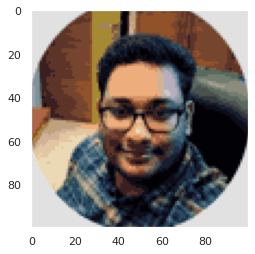

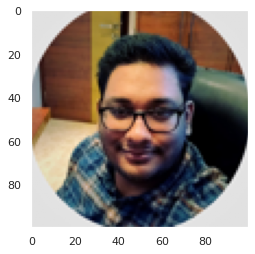

for K 64


final result


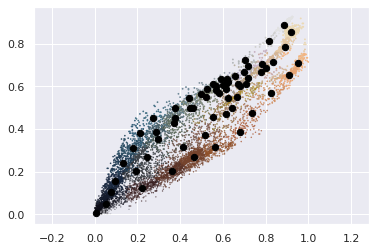

[[0.00828641 0.0056087  0.02199606]
 [0.88634928 0.88633897 0.88621521]
 [0.22303463 0.12244823 0.12482133]
 [0.95221158 0.71103511 0.5119015 ]
 [0.05291229 0.04956195 0.09247457]
 [0.91967725 0.85255943 0.70943953]
 [0.36217623 0.20200315 0.15590051]
 [0.077429   0.10399191 0.17105425]
 [0.66662017 0.54977912 0.20040301]
 [0.09668175 0.15767722 0.25126697]
 [0.81704374 0.81387632 0.80980392]
 [0.19343029 0.20342956 0.22250199]
 [0.89242273 0.78577601 0.64519774]
 [0.13069853 0.23872549 0.33363971]
 [0.7827957  0.70638836 0.771537  ]
 [0.41403509 0.31334218 0.26982161]
 [0.82651727 0.56886088 0.38706816]
 [0.69681373 0.66495098 0.76458333]
 [0.46366101 0.26747204 0.17733386]
 [0.90946204 0.6519457  0.46324786]
 [0.17806905 0.31018755 0.39360614]
 [0.70955092 0.61157495 0.46691967]
 [0.83478261 0.71449275 0.59629156]
 [0.24558054 0.26771379 0.28446771]
 [0.55455594 0.4549481  0.21434833]
 [0.21239409 0.3812152  0.47867344]
 [0.56485797 0.31599587 0.16280484]
 [0.29516009 0.3545793  0.32

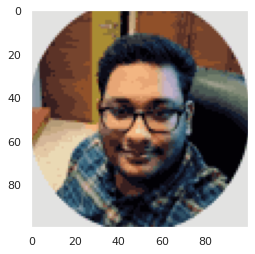

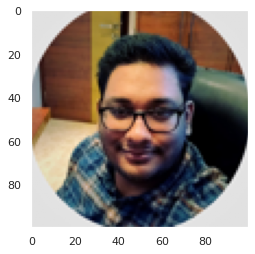

In [13]:
# TODO
# For K = 2, 4, 8, 16, 32, 64 
  # Perform K-means clustering for different values of K on RGB pixels; 
  # this will give you K RGB values as centroids of K clusters

  # Create a quantized image based on your cluster assignment
  # Plot original and quantized images 


for K in [2,3, 4, 8, 16, 32, 64 ]:
    print ('for K', K)
    labels, centroids, SSE_history, iters = kmeans_clustering_2(data,K,max_iter=100,tol=pow(10,-3))  
    print (centroids)
    print ('===============')
    print ()

    data_quantized = np.array([centroids[int(i)] for i in labels])
    img_quantized = np.reshape(data_quantized, (w ,h, c))
    plt.figure(1)
    plt.imshow(img_quantized)
    plt.grid(False)

    plt.figure(2)
    plt.imshow(img)
    plt.grid(False)
    plt.show()

### Answer the following questions [3 pts]

- Q: How many unique colors you have in the quantized image for K=2? [1 pt]

> A: 2

- Q: How is the quality of "quantized image" affected as you increase K? [1 pt]

> A: The image got better looking and the quality increased.

- Q: What value of K provides you best quality for the "quantized image"? [1 pt]

> A: As the value of K increases, the image gets better but after k=16, no visible change was noticed

## Question 2. Eigen Faces via Principal Component Analysis [15 pts]

In this question, we will 

- Compute the PCA for a simple data set using SVD.
- Visualize the PCA for images


__Load dataset__

We will use a dataset of cropped face images called LFW ("Labeled Faces in the Wild").

This face dataset was taken from news articles about 10 years ago.  The full data set has thousands of faces, but we will use a small subset here.  Since this data set is widely-used, it is installed as part of the `sklearn`. 

We first download the data.  This is large and can take several minutes.

In [14]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

Once the data is loaded, we can get see the dimensions

In [15]:
# Get images
n_samples, h, w = lfw_people.images.shape
npix = h*w

# Data in 2D form
X = np.transpose(lfw_people.data) 

# NOTE: In many of the libraries the data is stored as N x d array, 
# where N is the number of training samples and d is the length of each data vector
# Since we use a different notation in the class, I will stick with that. 

# Data array has dimensions 1850 x 1288 -- (pixels) x (faces)
# Each data vector is stored as a column in the matrix. 

# Labels of images 
y = lfw_people.target
target_names = lfw_people.target_names 

print("Image size     = {0:d} x {1:d} = {2:d} pixels".format(h,w,npix))
print("Number faces   = {0:d}".format(n_samples)) 

Image size     = 50 x 37 = 1850 pixels
Number faces   = 1288


__Plotting the Faces__

We will plot a few faces to look at the dataset.

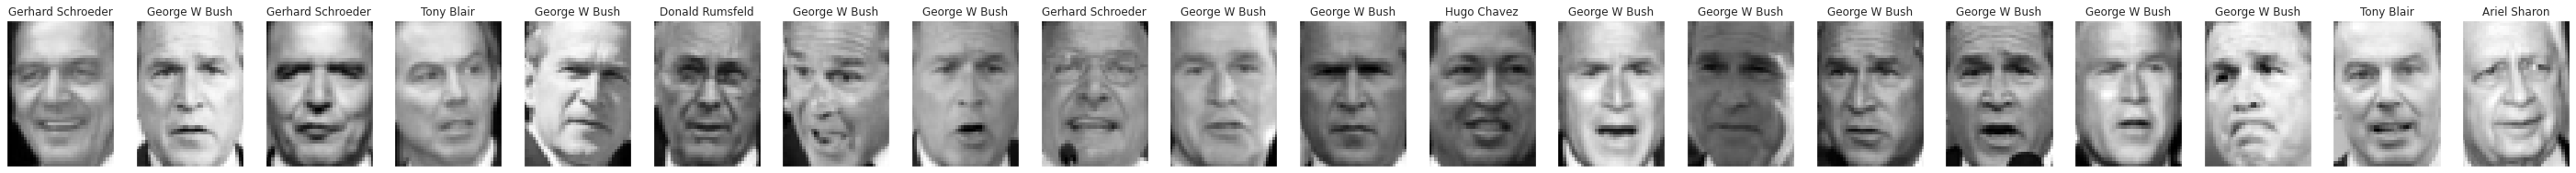

In [16]:
def plt_face(x):
    h = 50
    w = 37
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    
I = np.random.permutation(n_samples)
plt.figure(figsize=(50,70))

T = 20
for i in range(T):    
    ind = I[i]
    plt.subplot(1,T,i+1)
    plt_face(X[:,ind])
    plt.title(target_names[y[ind]])

### Computing the PCA via SVD 
To compute principal components (PCs), you will perform two steps. 

1. Subtract the mean from the data set.
2. Compute the singular value decomposition (SVD)

Suppose $X$ is the $D\times N$ data matrix. ($D$ is the number of pixels in each image, $N$ is the number of images.)

You will first remove mean column from all the columns (because data vectors are stored as columns). 

``` Xs = X - np.mean(X,1,keepdims = True) ``` 

Then we will compute an SVD of mean-substracted data as 

``` U_, S_, Vt_ = np.linalg.svd(Xs, full_matrices=False)```

Note that in python the SVD returns a list of singular values and `V.T` instead of `V`. 
The `full_matrices` option gives the *economy* SVD


In [17]:
# Compute SVD 

# subtract mean from the dataset 
# since data vectors are stored as columns, the mean of columns should be zero

npix = h*w
Xmean = np.mean(X,1,keepdims=True)
Xs = X - Xmean

U_,S_,Vt_ = np.linalg.svd(Xs, full_matrices=False)

Text(0.5, 0, 'index')

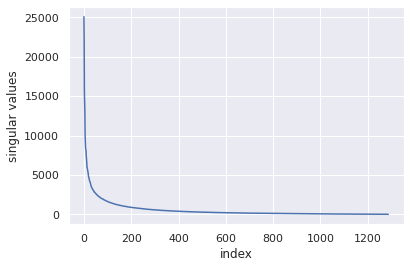

In [18]:
# We can plot the singular values

plt.figure()
plt.plot(S_)
plt.ylabel('singular values')
plt.xlabel('index')

Next we will approximate the data using $r$ principal components/factors as

    X ~= Xhat = Xmean + U.dot(Z) 
    
The terms

*  `U` are the top-$r$ principal components/factors from `U_` computed from data.
*  `Z` are the coefficients of data samples (or projections onto principal components). Note that we can compute $Z = U^T X$.  

For instance, we can compute $Z$ for $r = 20$ and the approximate data as

In [19]:
# Compute Z for r = 20 
N = X.shape[1]
Z = U_.T.dot(Xs) 

r = 20
Xest = Xmean + U_[:,:r].dot(Z[:r,:])

[1268  147  536]
Approximated faces (above)


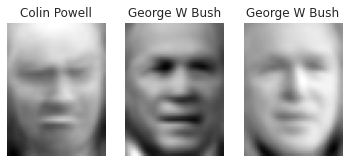

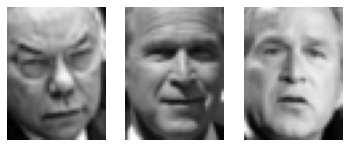

Original faces (below)


<Figure size 432x288 with 0 Axes>

In [20]:
# plot some sample images
T = 3; 
inds = np.random.permutation(n_samples)
inds = inds[:T]
print(inds)

# plot approximated faces
print('Approximated faces (above)')
for i in range(T):
  plt.subplot(1,T,i+1)
  # plt.imshow(np.reshape(Xest[:,inds[i]],(h,w)))
  plt_face(Xest[:,inds[i]])
  plt.grid(False)
  plt.axis('off')
  plt.title(target_names[y[inds[i]]])
  if i == 0:
    plt.ylabel('Approximation')

plt.show()

# plot original faces 
for i in range(T):
  plt.subplot(1,T,i+1)
  # plt.imshow(np.reshape(X[:,inds[i]],(h,w)))
  plt_face(X[:,inds[i]])
  plt.grid(False)
  plt.axis('off')
  # plt.title(target_names[y[inds[i]]])
  if i == 0:  
    plt.ylabel('Original')

plt.show()
plt.tight_layout()

print('Original faces (below)')

### Plotting Approximated Images from PCs [10 pts]

We will now plot the images approximated using different values of $r$. 

Select 3 images at random from the dataset and find its approximation using top  $r$ factors for $r = \{0, 5, 10, 50, 100, 200\}$. 

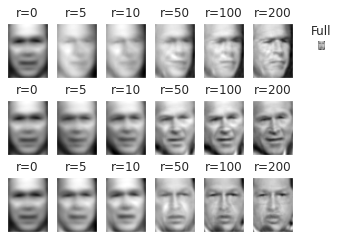

In [21]:
# TODO 
  # select 3 images
  # select r = [0, 5, 10, 50, 100, 200]
  # find approximation of selected images and plot them

T = 3                             # number of faces to plot
r_list = [0, 5,10,50,100,200]    # number of SVD approximations
nr = len(r_list)

# TODO 
# Select random faces 
inds = np.random.permutation(n_samples)
inds = inds[:T]

# TODO 
# Loop over figures
# compute approximation with r factors 
iplt = 0
for ind in inds:
    for r in r_list:
        plt.subplot(T,nr+1,iplt+1)
        
        # Reconstruct with SVD
        # TODO  
        Xhati = Xmean + U_[:,:r].dot(Z[:r,:])

        plt_face(Xhati[:,ind])
        plt.title('r={0:d}'.format(r))
        iplt += 1
    
    # Plot the true face
    plt.subplot(iplt,nr+1,iplt+1)
    plt_face(X[:,ind])
    plt.axis('off')
    plt.title('Full')
    iplt += 1

Finally, pick 10 top PCs and plot them as images. 

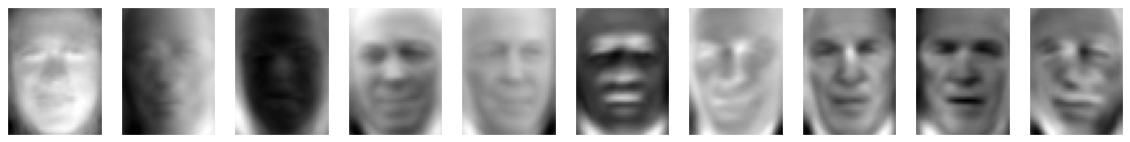

In [22]:
# TODO 
  # Plot first 10 PCs (i.e., columns in U_) as images

plt.figure(figsize=(20,30))
T = 10
for i in range(T):    
    plt.subplot(1,T,i+1)
    plt_face(U_[:,i])

### Best and Worst Approximation [5 pts]

You can convince yourself that the $\ell_2$ norm of the approximation error of any data vector is same as the $\ell_2$ norm of the unused coefficients. 

Using this property, find the best and worst 5 images in the dataset that give smallest and largest error in approximation with top 200 PCs? Plot them. 

Text(0, 0.5, 'Z residual')

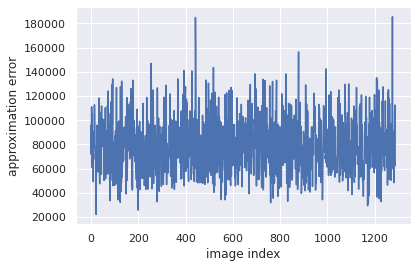

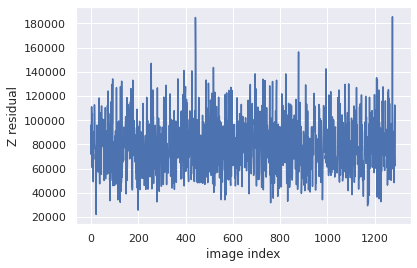

In [23]:
# We can compute the L2 norm of the approximation error for each image as 
# the L2 norm of the unused coefficients

r = 200
Xest = Xmean + U_[:,:r].dot(Z[:r,:])

error = pow(Xest-X,2)
est_error = np.sum(error,axis=0)
plt.figure()
plt.plot(est_error)
plt.xlabel('image index')
plt.ylabel('approximation error')

res = pow(Z[r:,:],2)
Z_residual = np.sum(res,axis=0)
plt.figure()
plt.plot(Z_residual)
plt.xlabel('image index')
plt.ylabel('Z residual')


worst


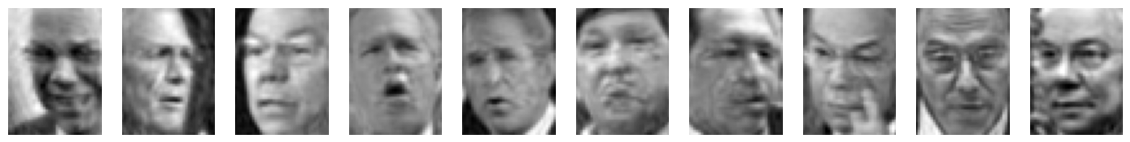

In [27]:
# TODO
# Plot the "Worst/Hardest" images to reconstruct with 200 PCs

# Sort error/residual in decreasing order and pick top 5 indices 
error = pow(Xest-X,2)
est_error = np.sum(error,axis=0)
sort_index = np.argsort(est_error)[-10:]

# your code goes here 

plt.figure(figsize=(20,30))
print('worst')
T = sort_index
for idx,i in enumerate(T):    
    plt.subplot(1,len(T),idx+1)
    plt_face(Xest[:,i])


best


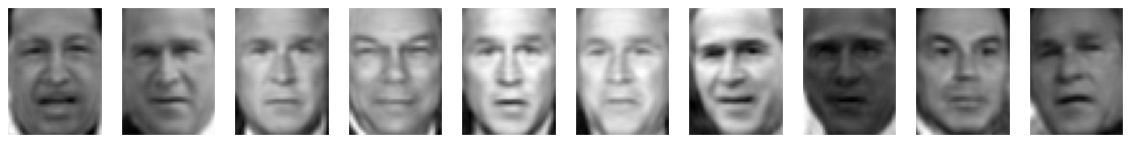

In [28]:
# TODO
# Plot the "Best/Easiest" images to reconstruct with 200 PCs

# Sort error/residual in increasing order and pick top 5 indices 
error = pow(Xest-X,2)
est_error = np.sum(error,axis=0)
sort_index = np.argsort(est_error)[:10]

# your code goes here 
plt.figure(figsize=(20,30))
print('best')
T = sort_index
for idx,i in enumerate(T):    
    plt.subplot(1,len(T),idx+1)
    plt_face(Xest[:,i])

---
## Submission instructions
1. Download this Colab to ipynb, and convert it to PDF. Follow similar steps as [here](https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab) but convert to PDF.
 - Download your .ipynb file. You can do it using only Google Colab. `File` -> `Download` -> `Download .ipynb`
 - Reupload it so Colab can see it. Click on the `Files` icon on the far left to expand the side bar. You can directly drag the downloaded .ipynb file to the area. Or click `Upload to session storage` icon and then select & upload your .ipynb file.
 - Conversion using %%shell. 
 ```
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!jupyter nbconvert --log-level CRITICAL --to pdf name_of_hw.ipynb
  ```
 - Your PDF file is ready. Click 3 dots and `Download`.


  

2. Upload the PDF to Gradescope, select the correct pdf pages for each question. **Important!**

3. Upload the ipynb file to Gradescope


Notice:
In case of errors in conversion, please check your LaTeX and debug. In Markdown, when you write in LaTeX math mode, do not leave any leading and trailing whitespaces inside the dollar signs ($). For example, write `(dollarSign)\mathbf(dollarSign)(dollarSign)` instead of `(dollarSign)(space)\mathbf{w}(dollarSign)`. Otherwise, nbconvert will throw an error and the generated pdf will be incomplete. [This is a bug of nbconvert.](https://tex.stackexchange.com/questions/367176/jupyter-notebook-latex-conversion-fails-escaped-and-other-symbols)


In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

In [ ]:
!jupyter nbconvert --log-level CRITICAL --to pdf fall2022_hw4.ipynb # make sure the ipynb name is correct